<a href="https://colab.research.google.com/github/Tashik-Ahd/AI-ML-Projects/blob/main/CSE428_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
NAME = "Tashik Ahmed"

# Necessary library import

In [ ]:
import numpy as np
from skimage import io, color, exposure, img_as_float
import matplotlib.pyplot as plt

# Task 1 - Basic Image Operation

import your image or any photo taken by you (`sample.jpeg`) as a numpy array, save it in the varaible `I`.

A picture taken from your phone of any scenary/streets/building is better.

remember your image name MUST be `sample.jpeg`.

Make sure the height and the width of the image is **smaller than 1000 pixels**.

<class 'numpy.ndarray'>
Height is 750
Width is 1000


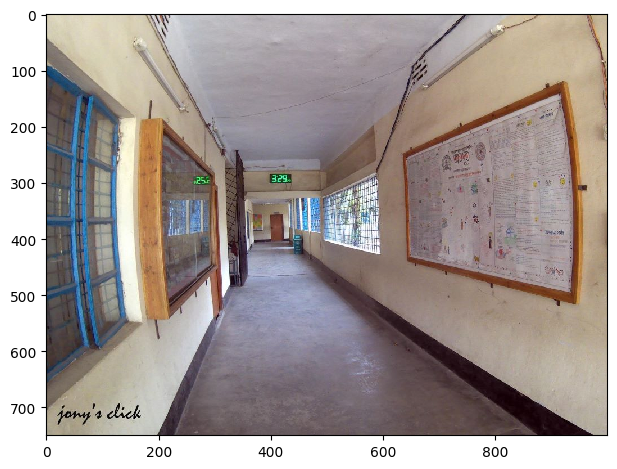

In [ ]:
### BEGIN SOLUTION

I =  img_as_float(io.imread("/content/sample.JPG"))
print(type(I))
h, w, _ = I.shape
io.imshow(I)
# find the height and the width of the image
H = h # should contain height
W = w # should contain width
print("Height is", H)
print("Width is", W)

### END SOLUTION

In [ ]:
print(I)

[[0.8231502  0.83099333 0.84332353 ... 0.7485651  0.74072196 0.72895725]
 [0.83099333 0.8349149  0.83940196 ... 0.7485651  0.74072196 0.73287882]
 [0.83883647 0.8349149  0.83548039 ... 0.7508051  0.74296196 0.73904039]
 ...
 [0.66153961 0.65733529 0.64949216 ... 0.68338667 0.68590941 0.68590941]
 [0.66322118 0.65761804 0.6497749  ... 0.68788157 0.68788157 0.68396   ]
 [0.65537804 0.6475349  0.64193176 ... 0.68788157 0.68788157 0.68396   ]]


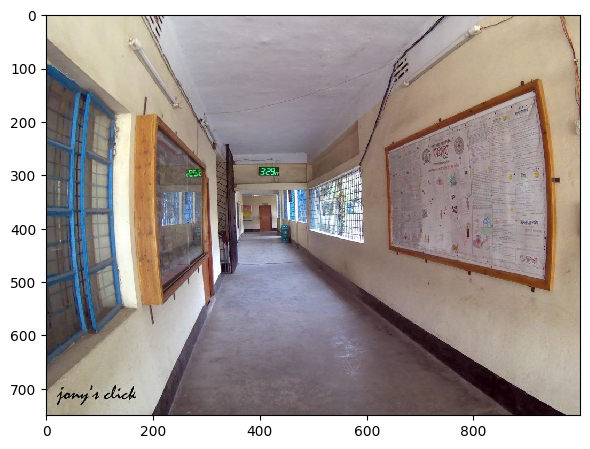

In [ ]:
# Normalize the image so that the gray scales are between 0 and 1. Save it to I and display the image
I = img_as_float(io.imread("/content/sample.JPG"))
#print(I) #Already Normalized
io.imshow(I, cmap='Greys_r')

### END SOLUTION

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


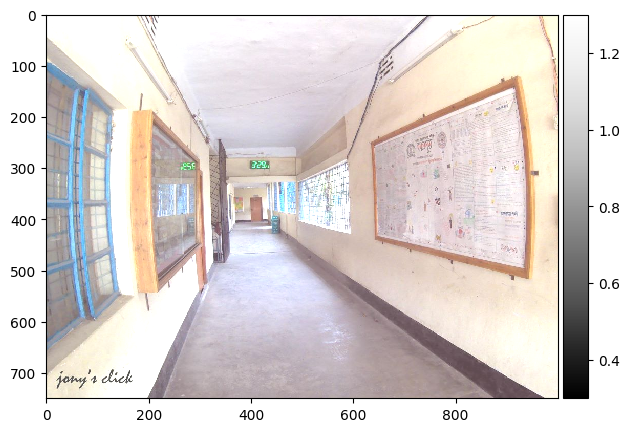

In [ ]:
# Increase the brightness of the image without changing the contrast.
# Save the resulting image in I_bright and display it.
I_bright = I + 0.3
io.imshow(I_bright, cmap='Greys_r')
### BEGIN SOLUTION

### END SOLUTION

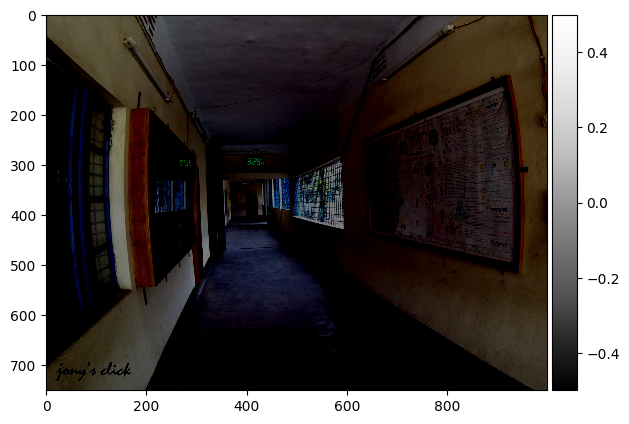

In [ ]:
# Decrease the brightness of the image without changing the contrast.
# Save the resulting image in I_dark and display it.
I_dark = I - 0.5
io.imshow(I_dark, cmap='Greys_r')

### BEGIN SOLUTION

### END SOLUTION

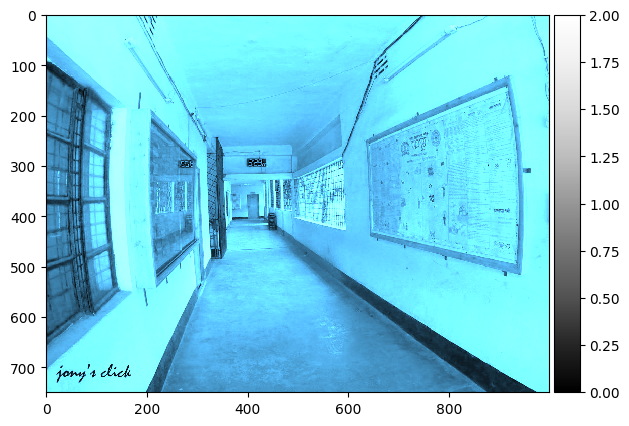

In [ ]:
# Multiply the three channels of image I with three DIFFERENT numbers between 0.3 and 3
# Save the resulting image in I_tint and display it.
# The resulting image should have some color shift

# HINT:
# I_tint = np.zeros(I.shape)
# I_tint[:, :, 0] =  ..... I[:, :, 0].....
# ......

### BEGIN SOLUTION
I_tint = np.zeros(I.shape)
I_tint[:, :, 0] = I[:, :, 0]*0.7
I_tint[:, :, 1] = I[:, :, 0]*1.5
I_tint[:, :, 2] = I[:, :, 0]*2
io.imshow(I_tint, cmap='Greys_r')
### END SOLUTION

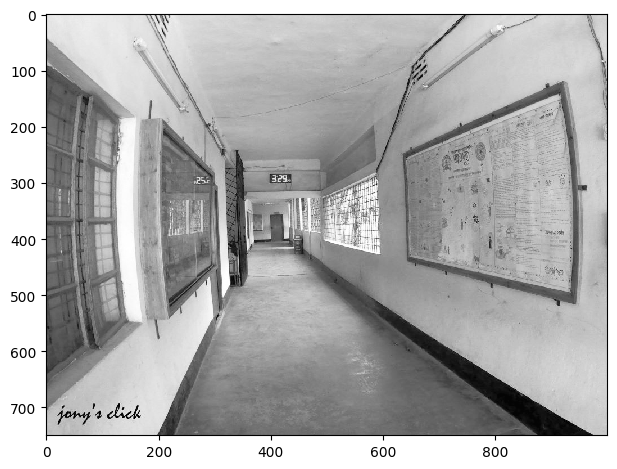

In [ ]:
# Convert the image into a grayscale image.
# Save it to I_gray and display it
I_gray = color.rgb2gray(I)
io.imshow(I_gray, cmap="Greys_r")

### BEGIN SOLUTION

### END SOLUTION

[[0.1768498  0.16900667 0.15667647 ... 0.2514349  0.25927804 0.27104275]
 [0.16900667 0.1650851  0.16059804 ... 0.2514349  0.25927804 0.26712118]
 [0.16116353 0.1650851  0.16451961 ... 0.2491949  0.25703804 0.26095961]
 ...
 [0.33846039 0.34266471 0.35050784 ... 0.31661333 0.31409059 0.31409059]
 [0.33677882 0.34238196 0.3502251  ... 0.31211843 0.31211843 0.31604   ]
 [0.34462196 0.3524651  0.35806824 ... 0.31211843 0.31211843 0.31604   ]]


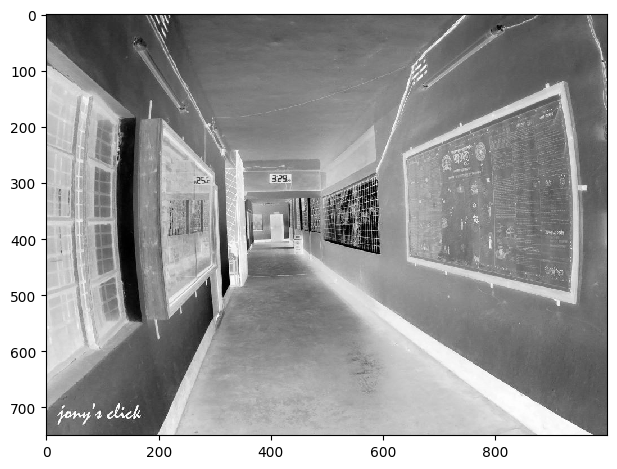

In [ ]:
# Display the negative of the grayscale image

### BEGIN SOLUTION
I_neg = 1-I_gray
print(I_neg)
io.imshow(I_neg, cmap='Greys_r')
### END SOLUTION

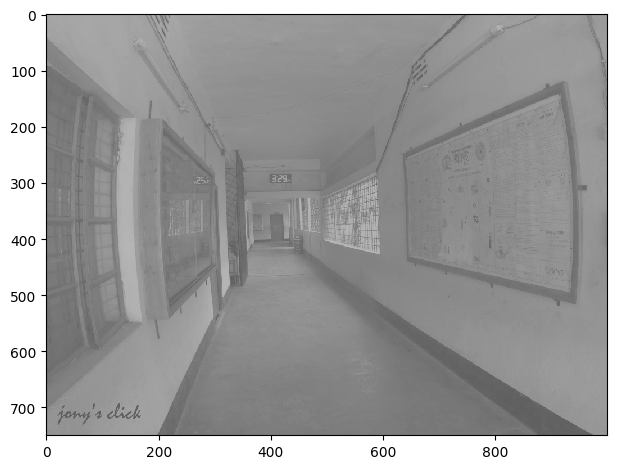

In [ ]:
# Artificially degrade the **grayscale image** by reducing it contrast
# You can do so by recaling the gray values and concentrating them in a narrow range,
# say between 0.3 and 0.6.
# Save the image as I_degraded and display it
# HINT: SEE lec-4-demo-codes

I_degraded = exposure.rescale_intensity(I_gray, in_range=(0, 1), out_range=(0.3, 0.6))
io.imshow(I_degraded, cmap='Greys_r')

### BEGIN SOLUTION

### END SOLUTION

In [ ]:
# Complete the following function to perform Piecewise Linear Contrast stretching
# That is, implement the map shown in Slide 17 of Lecture 3

# Prototype: piecewise_contrast_stretch(I_gray, r1, r2, s1, s2)
# Assuming both input and output images are normalized between 0 and 1

def piecewise_contrast_stretch(I, r1, r2, s1, s2):

    # Write your code here

    ### BEGIN SOLUTION
    I_stretched = np.zeros_like(I)

    I_stretched[I <= r1] = (s1 / r1) * I[I <= r1]  # For r in [0, r1]: compress to [0, s1]

    r1_r2 = (I > r1) & (I <= r2)  # For r in [r1, r2]: stretch to [s1, s2]
    I_stretched[r1_r2] = ((s2 - s1) / (r2 - r1)) * (I[r1_r2] - r1) + s1

    I_stretched[I > r2] = ((1 - s2) / (1 - r2)) * (I[I > r2] - r2) + s2 # For r in [r2, 1]: compress to [s2, 1]

    return I_stretched



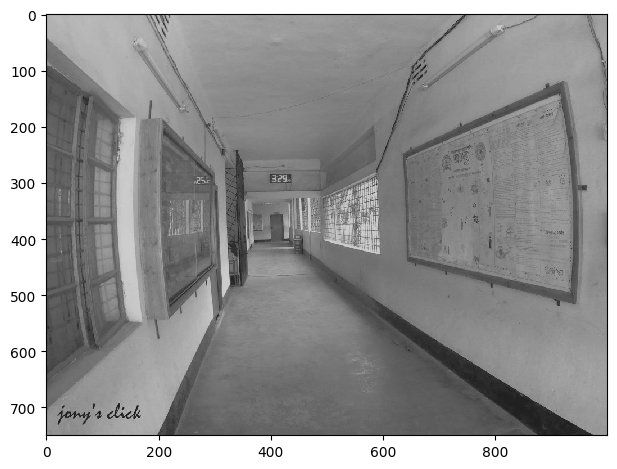

In [ ]:
# To test your implementation, contrast strech the degraded image I_degrade
r1 = 0.3
r2 = 0.7
s1 = 0.1
s2 = 0.9
I_stretched = piecewise_contrast_stretch(I_degraded, r1, r2, s1, s2)

# Display the strtched image

### BEGIN SOLUTION
io.imshow(I_stretched, cmap = 'Greys_r')
### END SOLUTION

# Task 2 - Histogram and Equalization

In [ ]:
def plot_hist(I, nbins=256, normalize=False, plot_cdf=True):

    hist, bins_hist = exposure.histogram(I.ravel(), nbins=nbins, normalize=normalize)
    plt.plot(bins_hist, hist, 'k')
    plt.xlabel("pixel values")
    if normalize:
        plt.ylabel("probability")
    else:
        plt.ylabel("count")
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])

    if plot_cdf:
        cdf, bins_cdf = exposure.cumulative_distribution(I.ravel(), nbins=nbins)
        plt.twinx()
        plt.plot(bins_cdf, cdf, 'r', lw=3)
        plt.ylabel("percentage")

<ipython-input-108-298923c1a227>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, 1)


Text(0.5, 1.0, 'Blue')

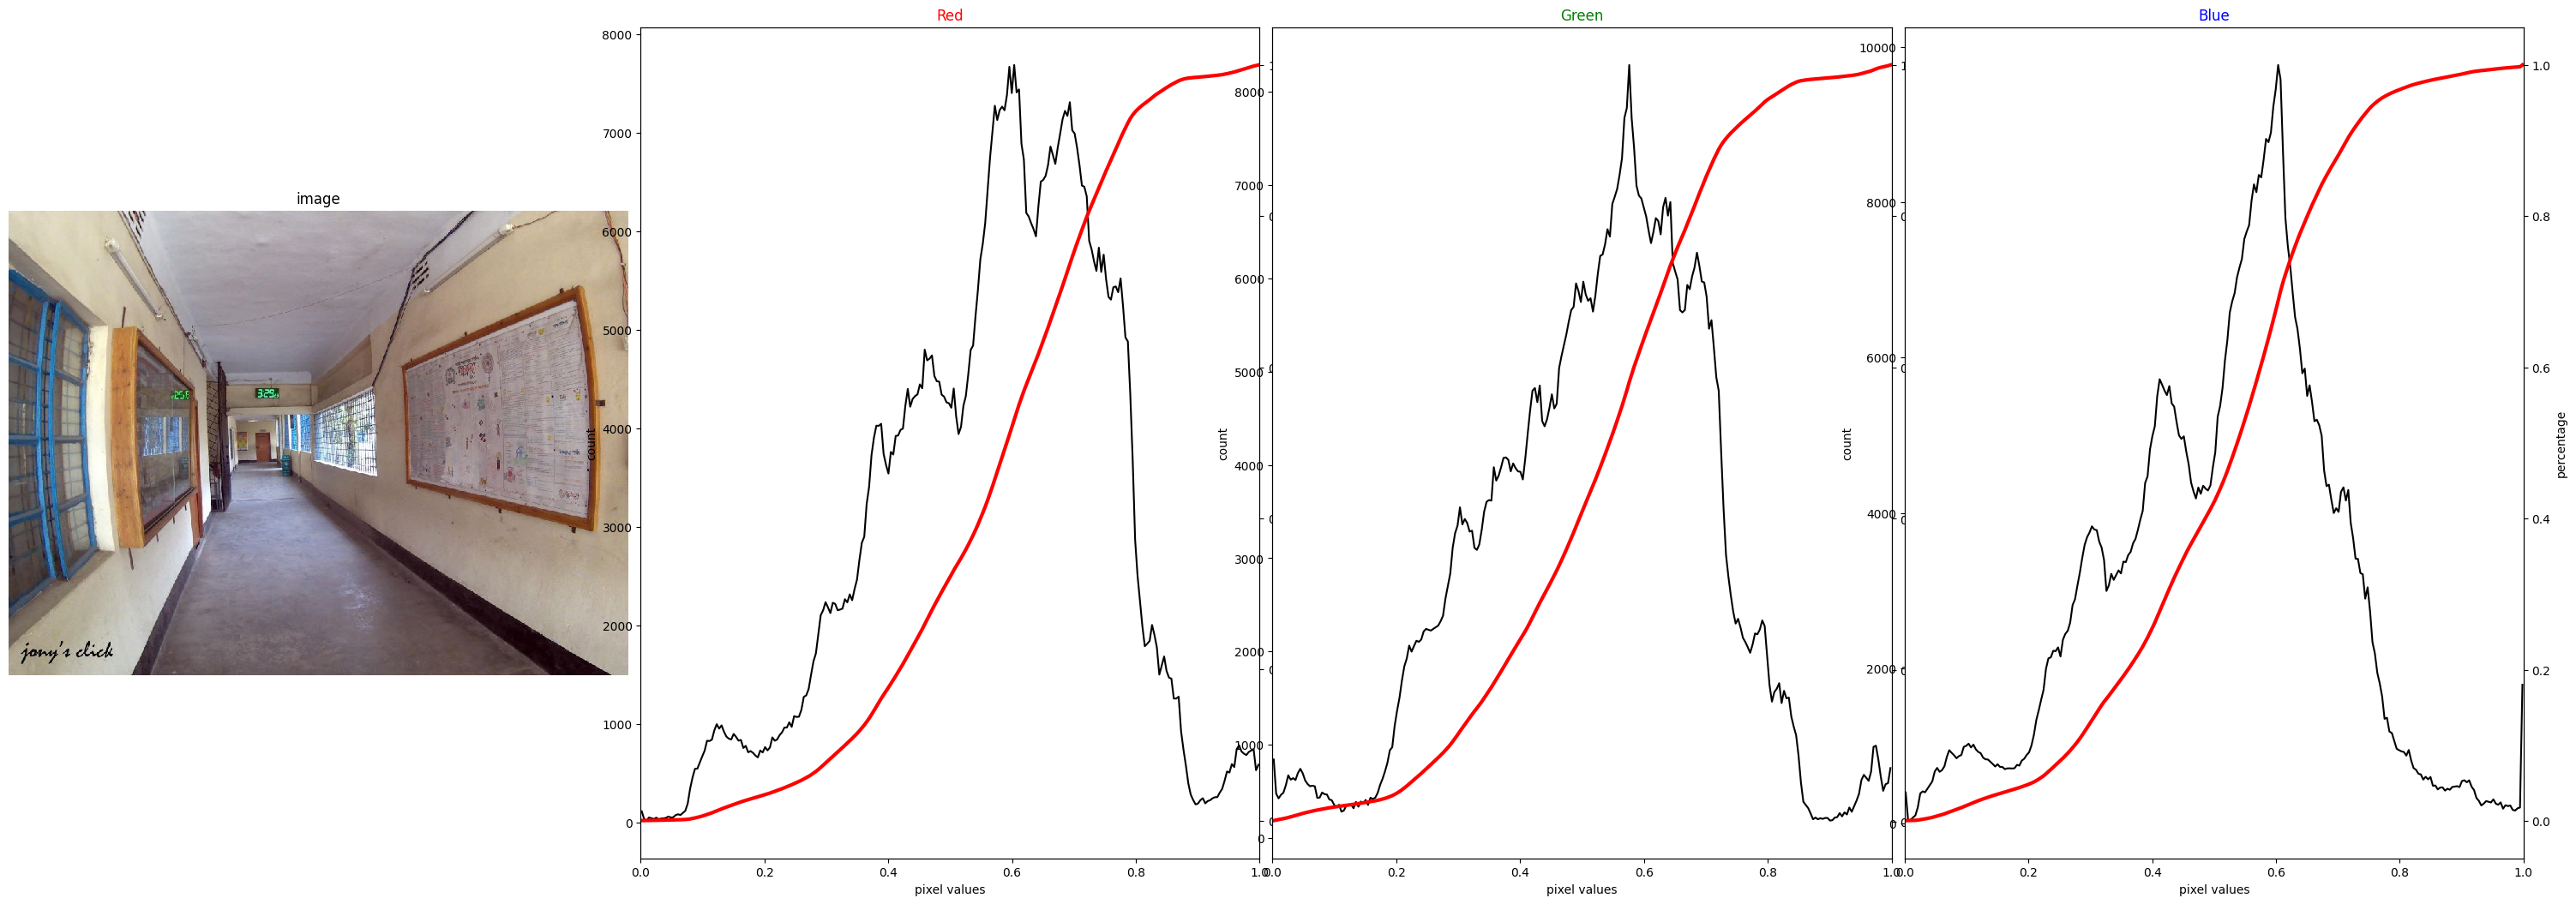

In [ ]:
# Plot the Image and its histogram + cdf of the original image I
# Note that it is a color image, so it will have three different histograms

### BEGIN SOLUTION
fig, ax = plt.subplots(2, 1, figsize=(30,10))
plt.subplot(1, 4, 1)
io.imshow(I)
plt.axis("off")
plt.title("image")

plt.rcParams['figure.figsize'] = (30, 10)
plt.subplot(1, 4, 2)
plot_hist(I[:, :, 0], plot_cdf=True)
plt.title("Red", color="red")

plt.subplot(1, 4, 3)
plot_hist(I[:, :, 1], plot_cdf=True)
plt.title("Green", color="green")

plt.subplot(1, 4, 4)
plot_hist(I[:, :, 2], plot_cdf=True)
plt.title("Blue", color="blue")
### END SOLUTION

In [ ]:
# Plot the Image and its histogram + cdf of the grayscale image I_gray

### BEGIN SOLUTION
def plot_img_and_hist(I, nbins=256, normalize=False, plot_cdf=True, figsize=(12, 6)):
    fig, ax = plt.subplots(2, 1, figsize=figsize)
    plt.subplot(2, 1, 1)
    io.imshow(I)
    plt.axis("off")
    plt.title("image")

    plt.subplot(2, 1, 2)
    plot_hist(I, nbins=nbins, normalize=normalize, plot_cdf=plot_cdf)
    plt.title("histogram")


### END SOLUTION

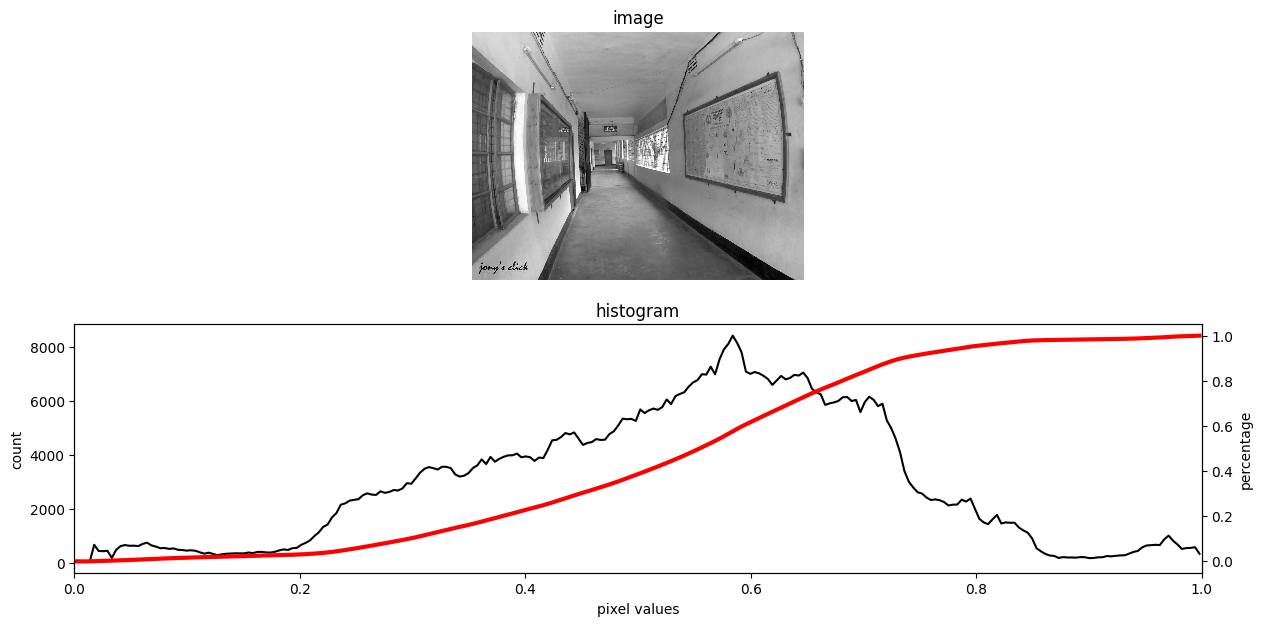

In [ ]:
plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(I_gray, normalize=False)
plt.show()

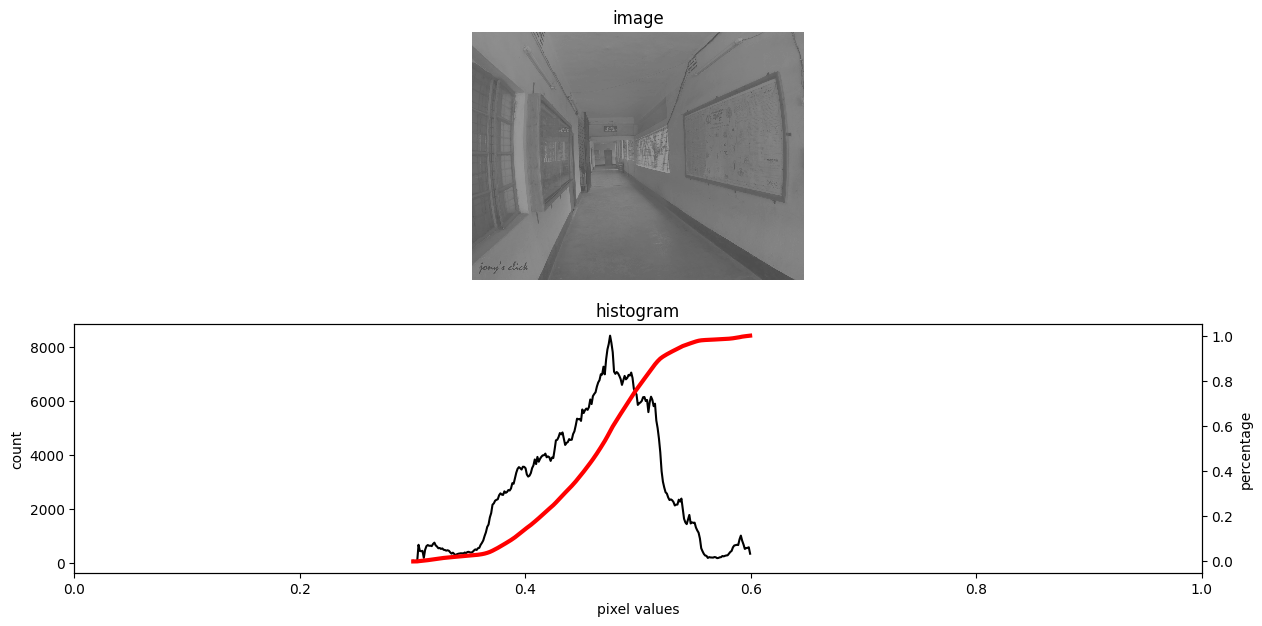

In [ ]:
# Plot the Image and its histogram + cdf of the degraded image I_degraded

### BEGIN SOLUTION
plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(I_degraded, normalize=False)
plt.show()
### END SOLUTION

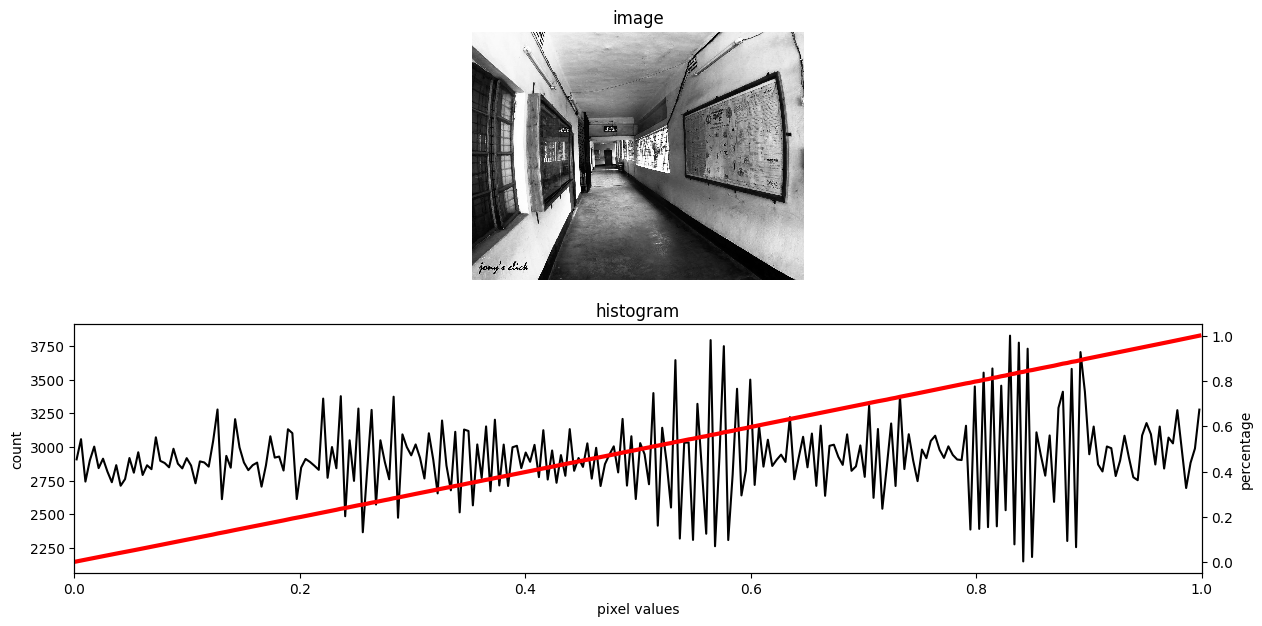

In [ ]:
# Equalize the histogram of the degraded image I_degraded
# Save the result in I_recon_gray, display the image along with its histogram

I_recon_gray = exposure.equalize_hist(I_degraded)

### BEGIN SOLUTION
plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(I_recon_gray)
### END SOLUTION

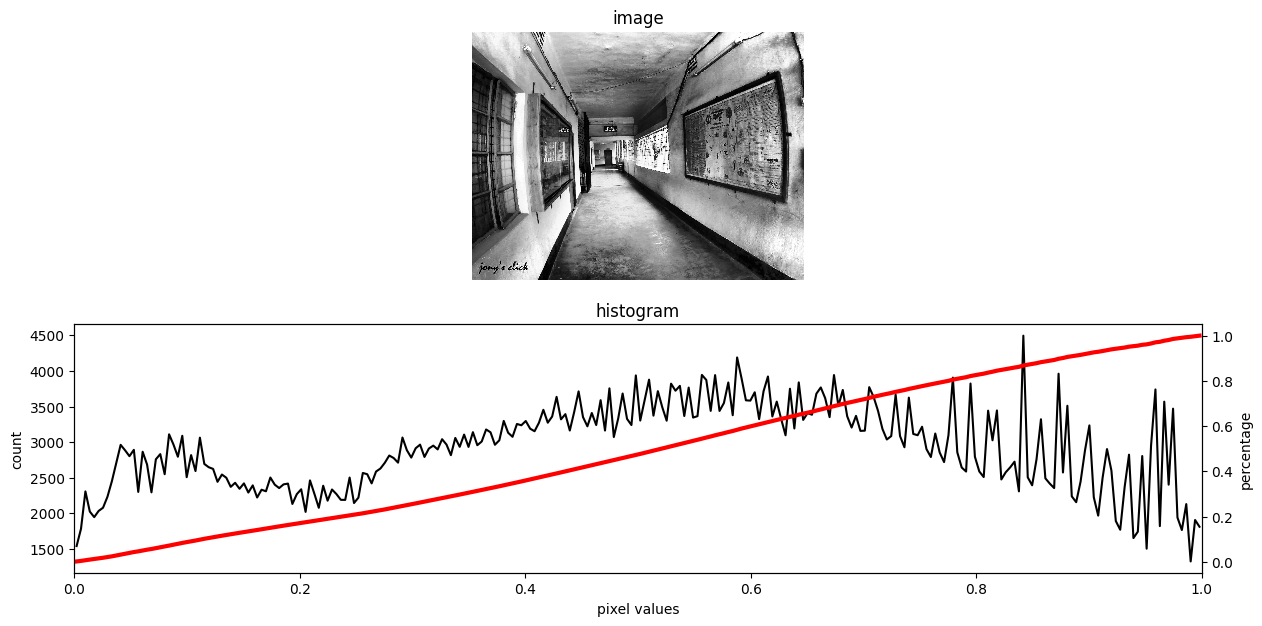

In [ ]:
# Equalize the histogram of the degraded image I_degraded using AHE
# Save the result in I_recon_gray_2, display the image along with its histogram

I_recon_gray_2 = exposure.equalize_adapthist(I_degraded, kernel_size=(256, 256), clip_limit=0)

### BEGIN SOLUTION
plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(I_recon_gray_2)
### END SOLUTION

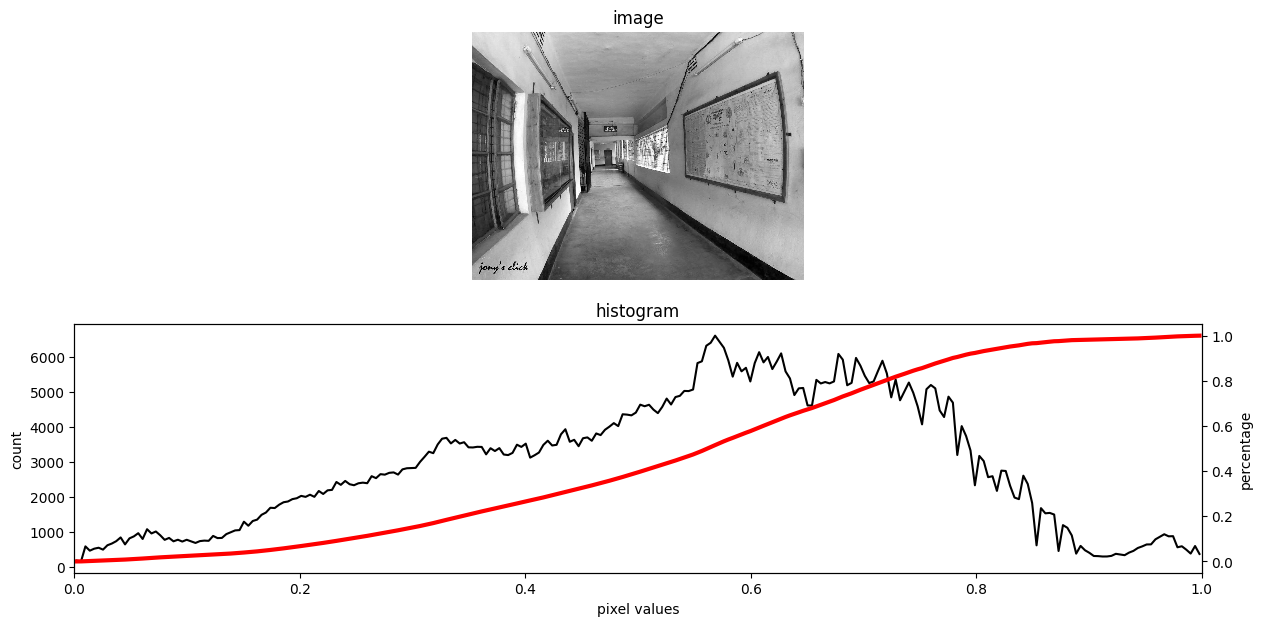

In [ ]:
# Equalize the histogram of the degraded image I_degraded using CLAHE
# Save the result in I_recon_gray_2, display the image along with its histogram

I_recon_gray_3 = exposure.equalize_adapthist(I_degraded, kernel_size=(256, 256), clip_limit=0.005)

### BEGIN SOLUTION
plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(I_recon_gray_3)
### END SOLUTION

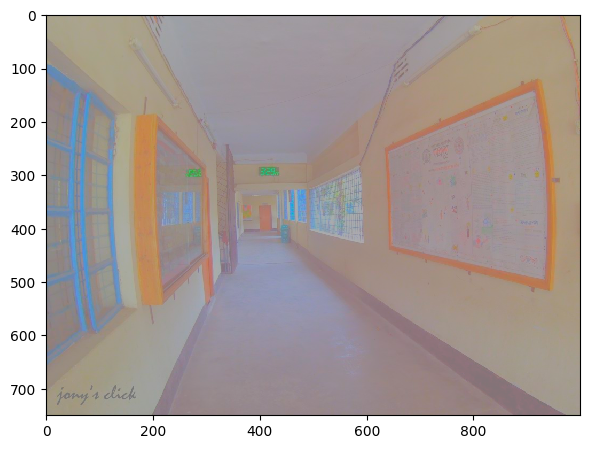

In [ ]:
# Artificially degrade the original **RGB image** by reducing it contrast
# You can do so by recaling the values of the L channel (in LAB color space)
# and concentrating them in a narrow range, say between 0.3 and 0.6.
# Save the image as I_rgb_degraded and display it


### BEGIN SOLUTION
Ilab = color.rgb2lab(I)
Ilab[:, :, 0] = Ilab[:, :, 0]/100
Idegraded_l = exposure.rescale_intensity(Ilab[:, :, 0], in_range=(0, 1), out_range=(0.5, 0.7))
Ilab[:, :, 0] = Idegraded_l*100
Idegraded = color.lab2rgb(Ilab)
I_rgb_degraded = Idegraded
io.imshow(I_rgb_degraded, cmap="Greys_r")
### END SOLUTION

Text(0.5, 1.0, 'Blue')

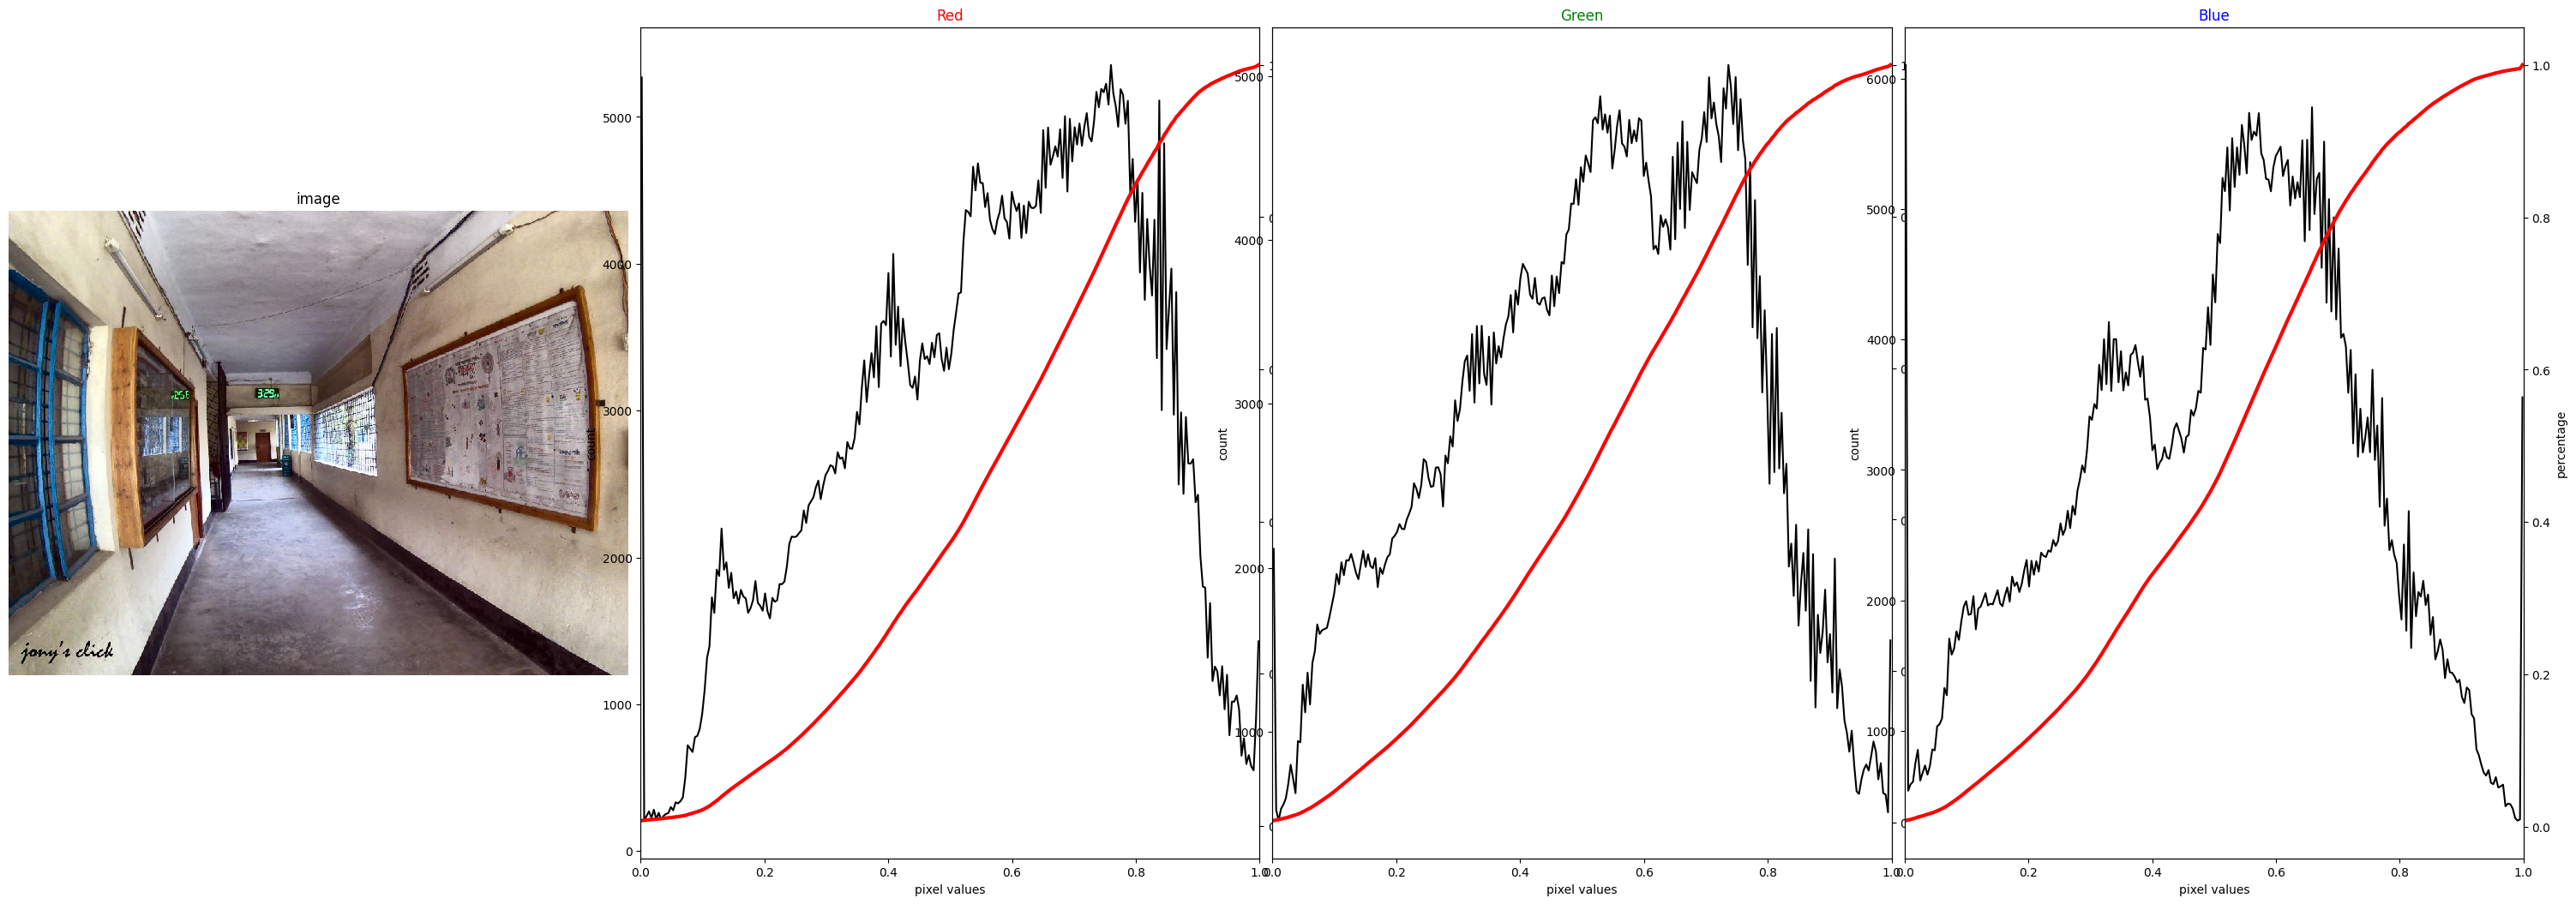

In [ ]:
# Equalize the histogram of the degraded color image I_rgb_degraded using CLAHE
# Save the result in I_recon_color, display the image along with its histogram
# HINT: You have to convert to LAB first
# See the lecture and lecture-4-demo-codes

I_recon_color = None

### BEGIN SOLUTION
Ilab = color.rgb2lab(I_rgb_degraded)
Ilab[:, :, 0] = Ilab[:, :, 0]/100
I_rgb_degraded_l = exposure.equalize_adapthist(Ilab[:, :, 0], kernel_size=(256, 256), clip_limit=0.008)
Ilab[:, :, 0] = I_rgb_degraded_l*100
I_recon_color = color.lab2rgb(Ilab)
#io.imshow(I_recon_color)


#fig, ax = plt.subplots(2, 1, figsize=(15,10))
plt.rcParams['figure.figsize'] = (30, 10)
plt.subplot(1, 4, 1)
io.imshow(I_recon_color)
plt.axis("off")
plt.title("image")

#plt.rcParams['figure.figsize'] = (15, 10)
plt.subplot(1, 4, 2)
plot_hist(I_recon_color[:, :, 0], plot_cdf=True)
plt.title("Red", color="red")

plt.subplot(1, 4, 3)
plot_hist(I_recon_color[:, :, 1], plot_cdf=True)
plt.title("Green", color="green")

plt.subplot(1, 4, 4)
plot_hist(I_recon_color[:, :, 2], plot_cdf=True)
plt.title("Blue", color="blue")
### END SOLUTION

# Task 3 - Open Ended
 ## ***There are 3 images in the drive directory below. Look at the questions from the brackets [.]. Answer them in the provided text cell at the bottom.***

 ### link:  https://drive.google.com/drive/folders/1ft3XrO-MGxhxL2PfcLCFQjU0wvvlLAv4?usp=sharing

In [ ]:
# Dark_Room.jpg = very dark [The windows are on walls. How does the wall look like?]
# Foggy_Road.jpg = washed out/foggy [How many vehicles do you think there are?]
# Read_the_code.jpg = Dark RGB Barcode [What is hidden in the Barcode?
#                                       Make it scanable, scan it and say something about the hidden message.]

# Your task is to improve these images using
# contrast stretching, histogram equalization, AHE or CLAHE
# try different combination of parameter settings to see which produces the best result

### BEGIN SOLUTION

### END SOLUTION

<ipython-input-114-dc7a12a9458a>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, 1)


Text(0.5, 1.0, 'Blue')

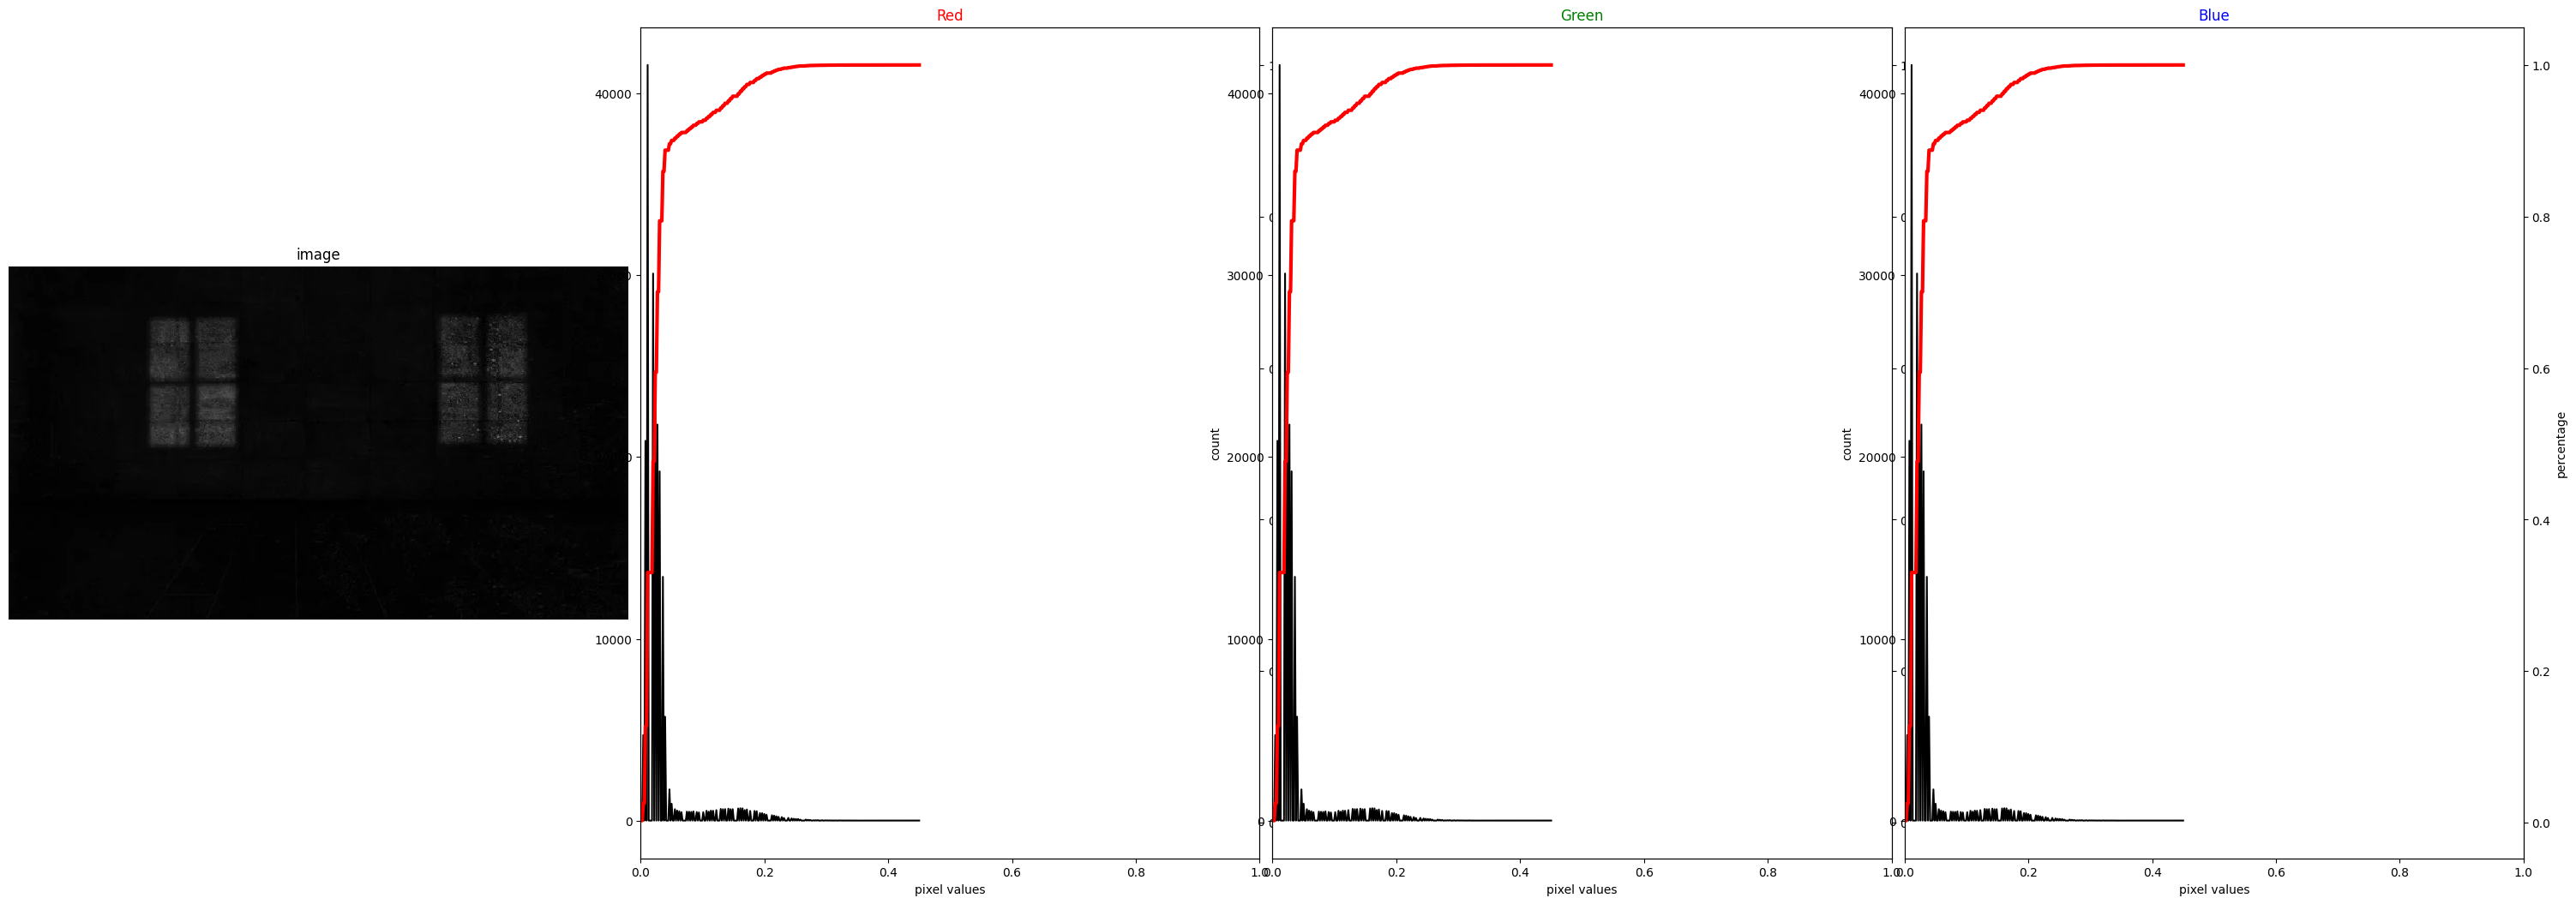

In [ ]:
I_dark = img_as_float(io.imread("/content/Dark_Room.jpg"))

fig, ax = plt.subplots(2, 1, figsize=(30,10))
plt.subplot(1, 4, 1)
io.imshow(I_dark)
plt.axis("off")
plt.title("image")

plt.rcParams['figure.figsize'] = (30, 10)
plt.subplot(1, 4, 2)
plot_hist(I_dark[:, :, 0], plot_cdf=True)
plt.title("Red", color="red")

plt.subplot(1, 4, 3)
plot_hist(I_dark[:, :, 1], plot_cdf=True)
plt.title("Green", color="green")

plt.subplot(1, 4, 4)
plot_hist(I_dark[:, :, 2], plot_cdf=True)
plt.title("Blue", color="blue")

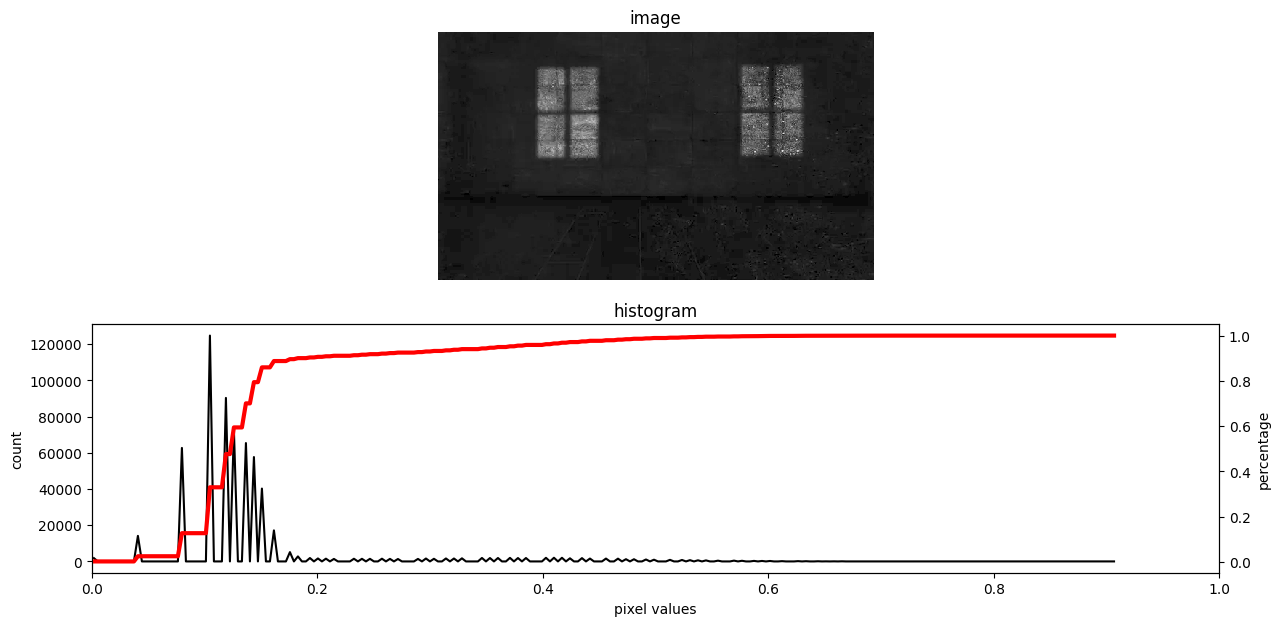

In [ ]:
r1 = 0.01
r2 = 0.4
s1 = 0.1
s2 = 0.9
I_stretched_dark = piecewise_contrast_stretch(I_dark, r1, r2, s1, s2)

plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(I_stretched_dark)

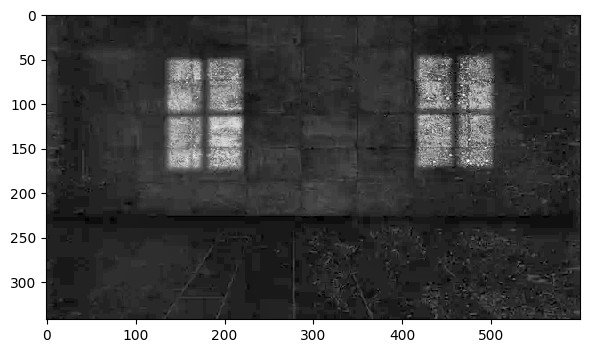

In [ ]:
Ilab = color.rgb2lab(I_stretched_dark)
Ilab[:, :, 0] = Ilab[:, :, 0]/100
I_dark_l = exposure.equalize_adapthist(Ilab[:, :, 0], kernel_size=(128, 128), clip_limit=0.02)
Ilab[:, :, 0] = I_dark_l*100
I_recon_dark = color.lab2rgb(Ilab)
io.imshow(I_recon_dark)

<ipython-input-142-4411801bba80>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, 1)


Text(0.5, 1.0, 'Blue')

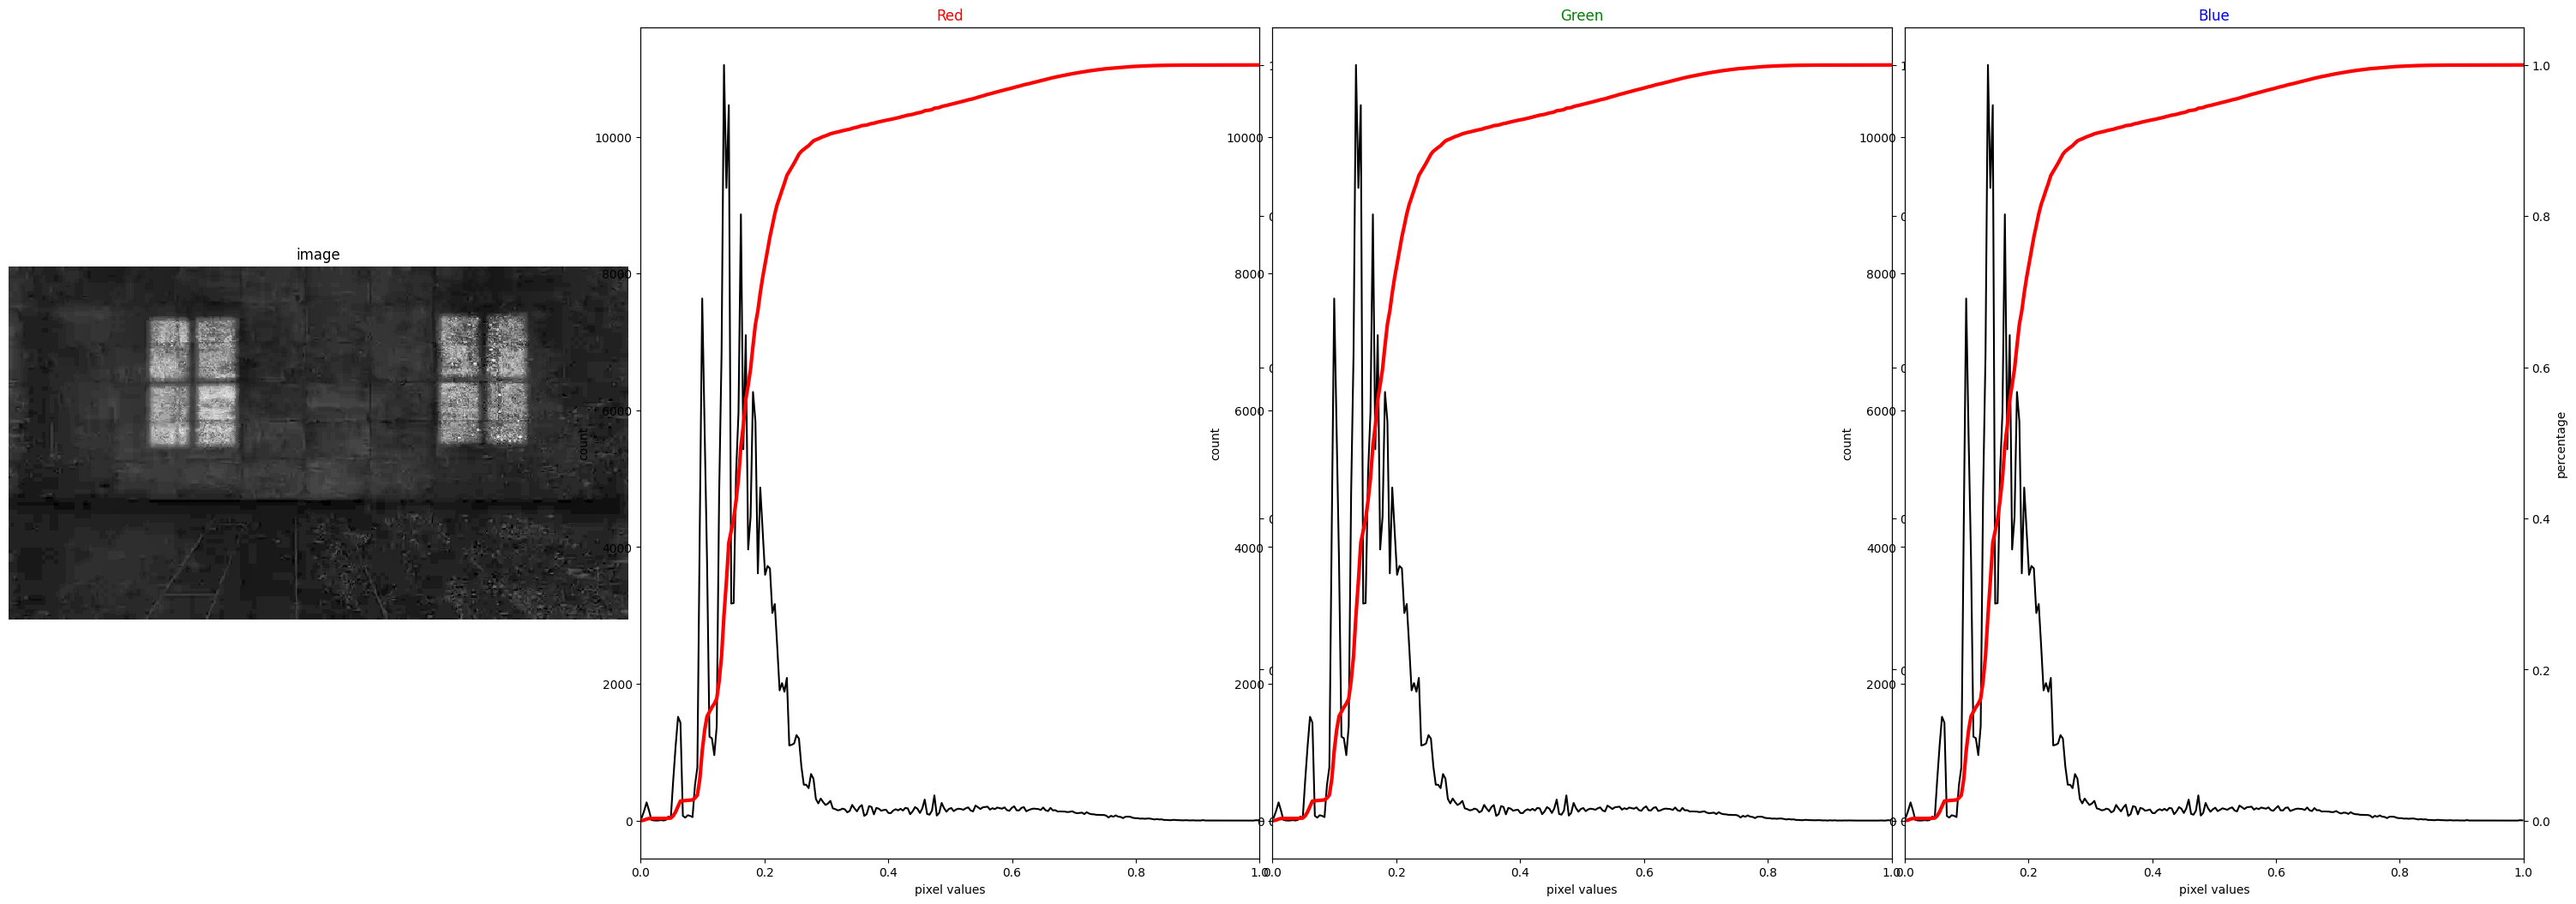

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(30,10))
plt.subplot(1, 4, 1)
io.imshow(I_recon_dark)
plt.axis("off")
plt.title("image")

plt.rcParams['figure.figsize'] = (30, 10)
plt.subplot(1, 4, 2)
plot_hist(I_recon_dark[:, :, 0], plot_cdf=True)
plt.title("Red", color="red")

plt.subplot(1, 4, 3)
plot_hist(I_recon_dark[:, :, 1], plot_cdf=True)
plt.title("Green", color="green")

plt.subplot(1, 4, 4)
plot_hist(I_recon_dark[:, :, 2], plot_cdf=True)
plt.title("Blue", color="blue")

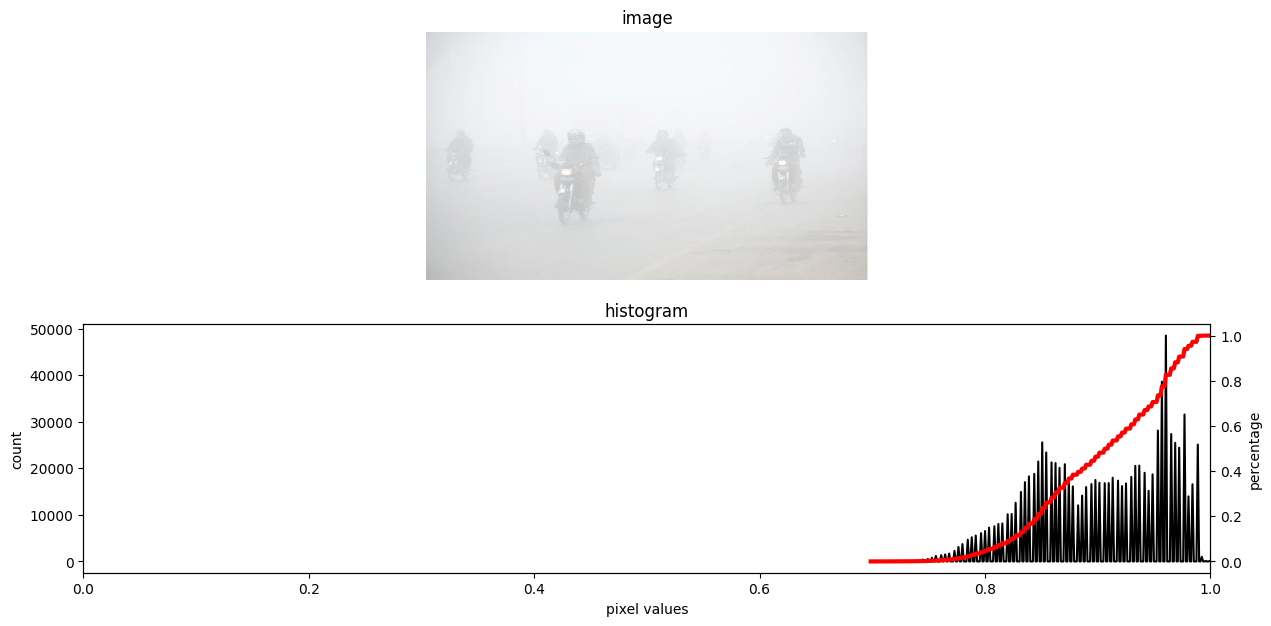

In [ ]:
I_foggy = img_as_float(io.imread("/content/Foggy_Road.jpg"))
plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(I_foggy)

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


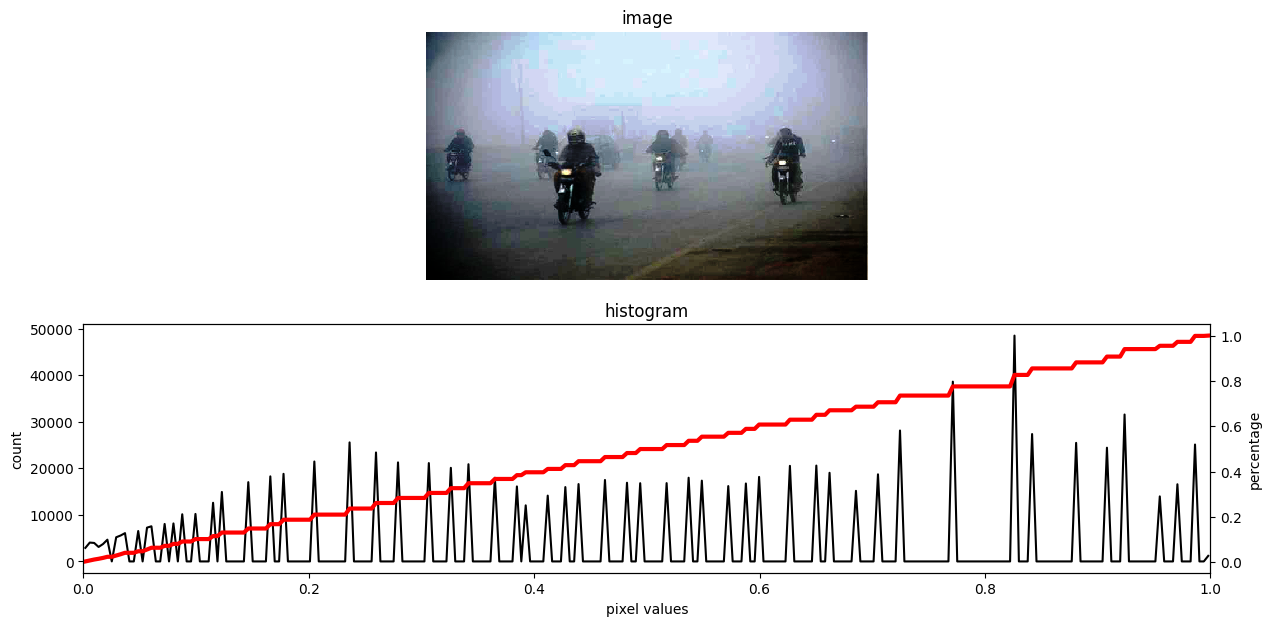

In [ ]:
Ieq = exposure.equalize_hist(I_foggy)
plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(Ieq)

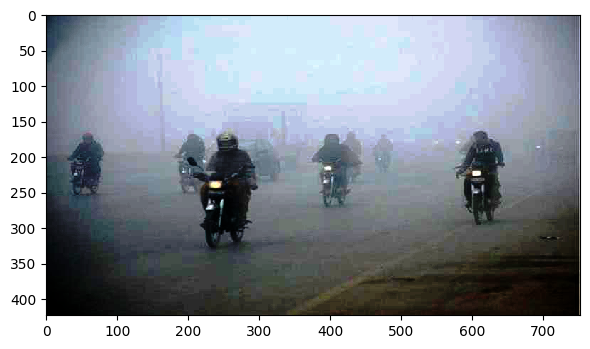

In [ ]:
io.imshow(Ieq)

In [ ]:
I_bar = img_as_float(io.imread("/content/Read_the_code.jpg"))


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


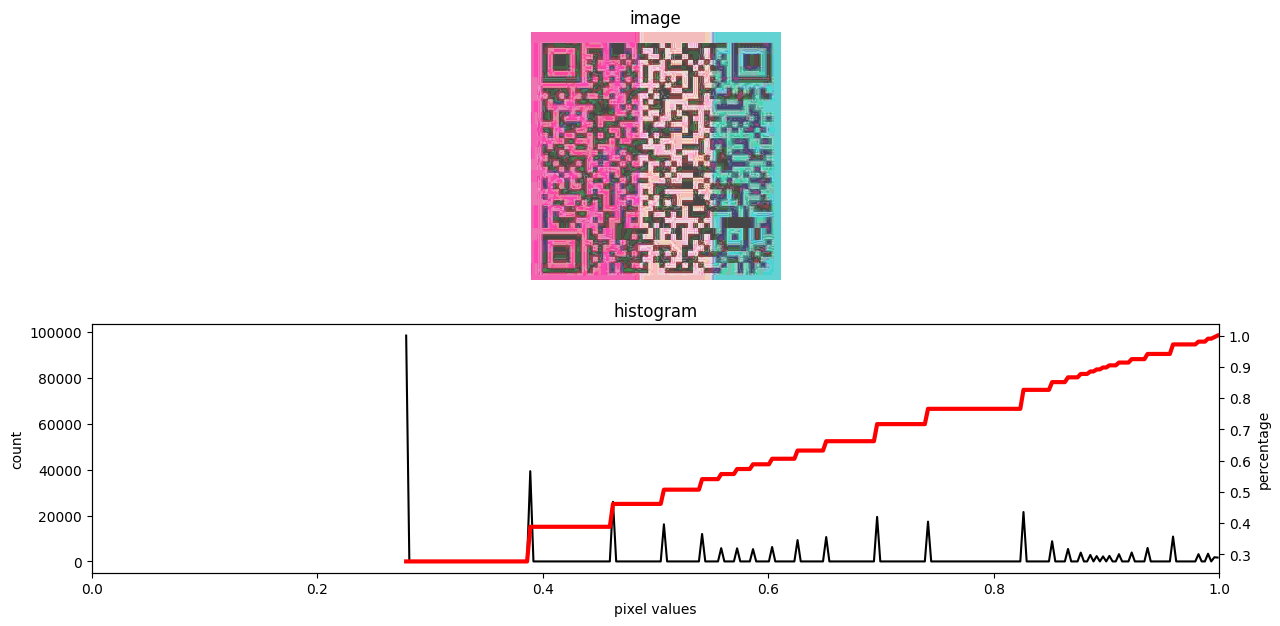

In [ ]:
Ieq = exposure.equalize_hist(I_bar)
plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(Ieq)

In [ ]:
Ans_1 = "The wall has multiple rectangle shaped blocks. The floor has similar type of patterns too."
Ans_2 = "9 vehicles(7 bikes, 1 car and 1 lorry truck)"